<a href="https://colab.research.google.com/github/Vishu6795/Vishalsharma-mcdonalds/blob/main/My_Contribution_Ev_Market_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving 3_ev_market_india_dataset.xlsx to 3_ev_market_india_dataset.xlsx
{'3_ev_market_india_dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xebz\xd2\x93b\x01\x00\x00\x90\x04\x00\x00\x13\x00\xdc\x01[Content_Types].xml \xa2\xd8\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df = pd.read_excel('3_ev_market_india_dataset.xlsx')

In [6]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [7]:
print("Dataset Info:")
print(df.info())
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
None
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH 

In [8]:
ev_market_clean = df.dropna().select_dtypes(include='number')

In [9]:
scaler = StandardScaler()
ev_market_scaled = scaler.fit_transform(ev_market_clean)

In [10]:
pca = PCA(n_components=2)
ev_market_pca = pca.fit_transform(ev_market_scaled)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(ev_market_pca)

In [12]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

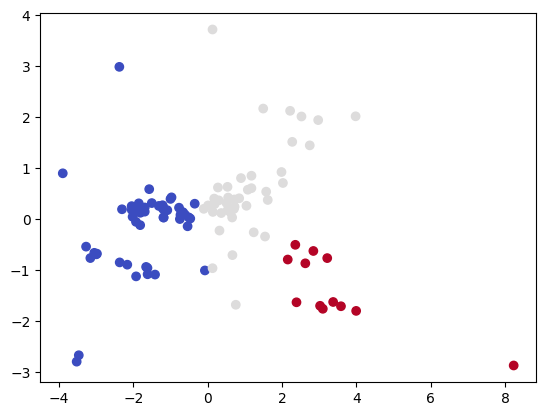

In [13]:
plt.scatter(ev_market_pca[:, 0], ev_market_pca[:, 1], c=labels, cmap='coolwarm')


In [14]:
ev_market_clean = df.dropna().select_dtypes(include='number')

In [15]:
scaler = StandardScaler()
ev_market_scaled = scaler.fit_transform(ev_market_clean)

In [16]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(ev_market_scaled)
    sse.append(km.inertia_)

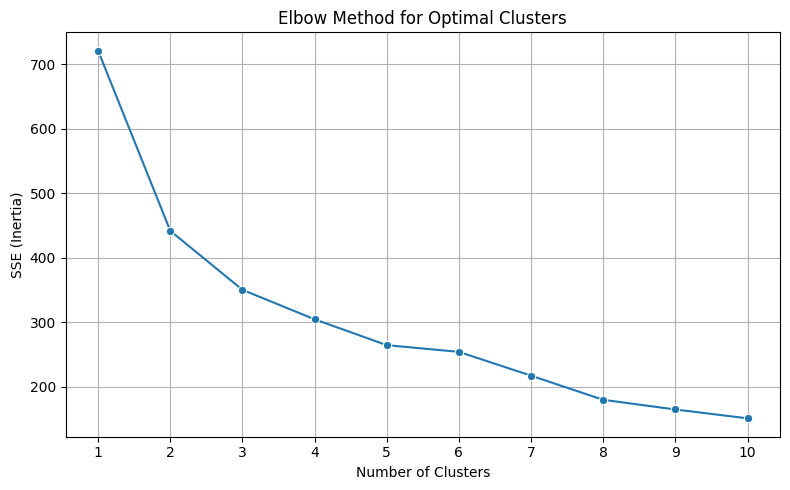

In [17]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=sse, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(ev_market_scaled)

In [19]:
pca = PCA(n_components=2)
ev_market_pca = pca.fit_transform(ev_market_scaled)
centroids = pca.transform(kmeans.cluster_centers_)

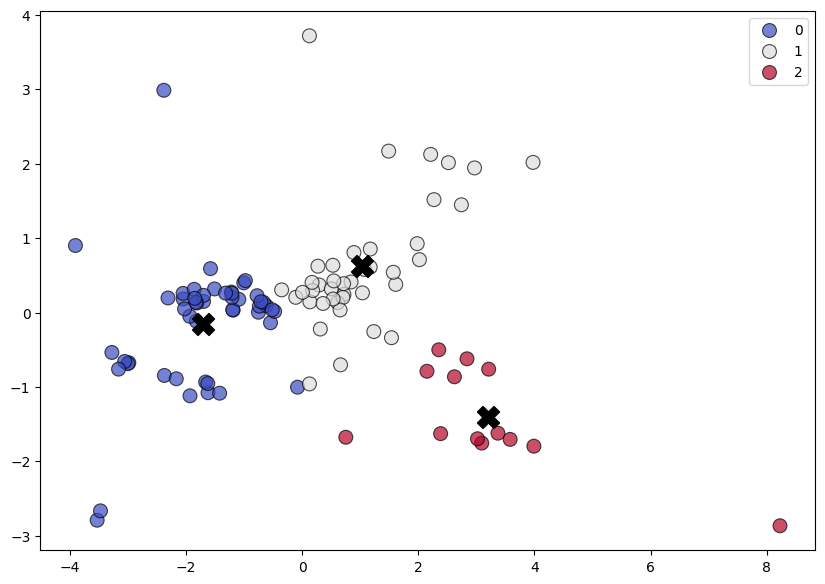

In [20]:

plt.figure(figsize=(10, 7))
sns.scatterplot(x=ev_market_pca[:, 0], y=ev_market_pca[:, 1], hue=labels, palette='coolwarm', s=100, alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='black', marker='X', label='Centroids')


<ipython-input-21-d4f670fb336e>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


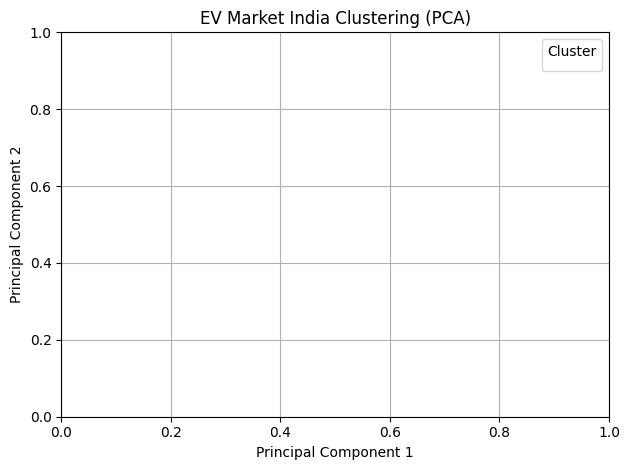

In [21]:
plt.title("EV Market India Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df['Cluster'] = labels

<ipython-input-23-0138e57b6a12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='coolwarm')


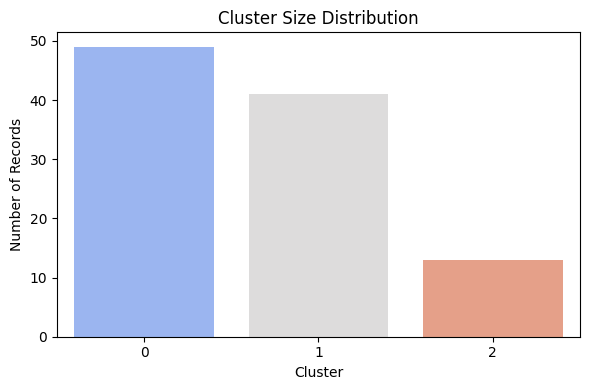

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


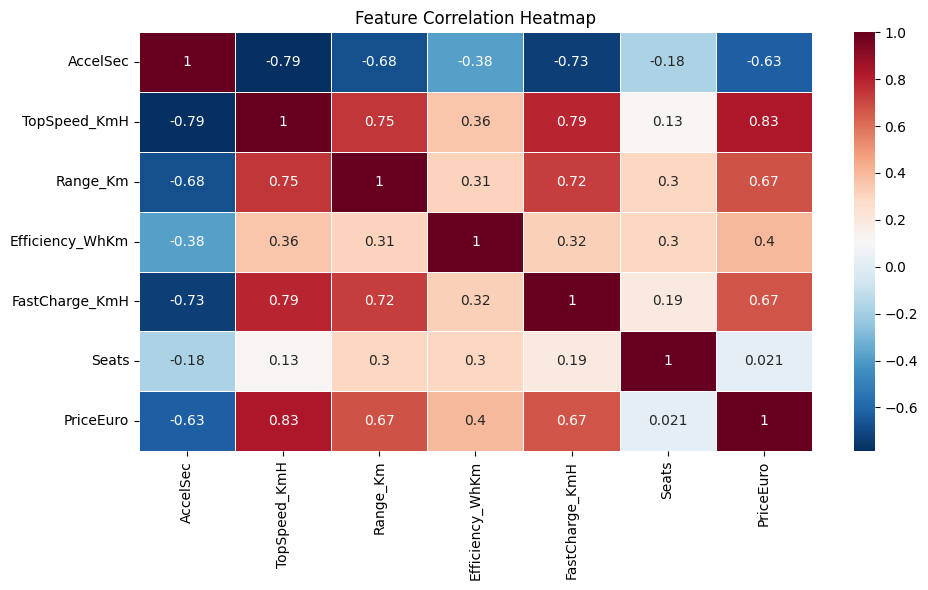

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(ev_market_clean.corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


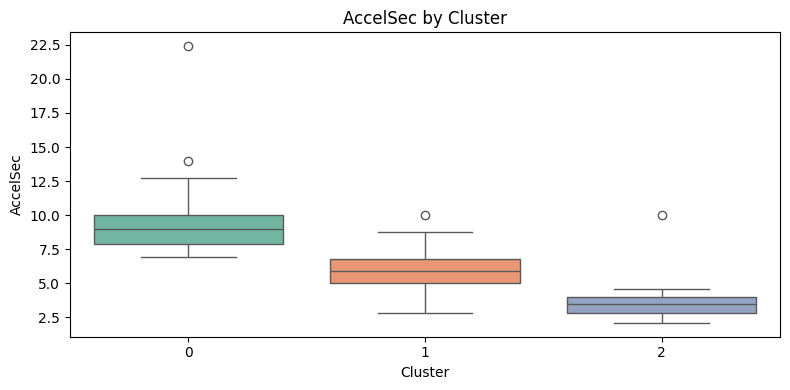

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


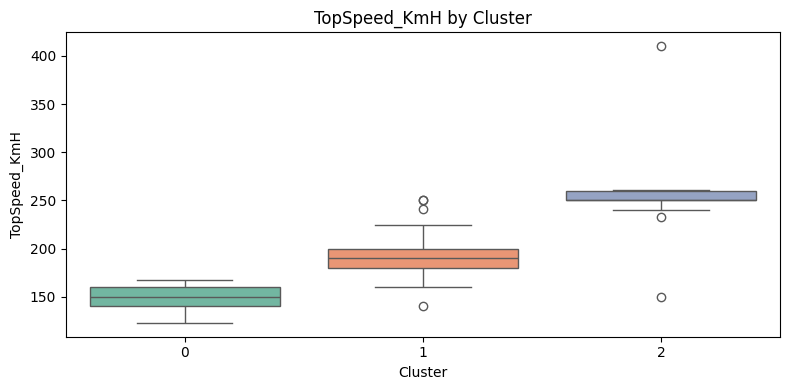

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


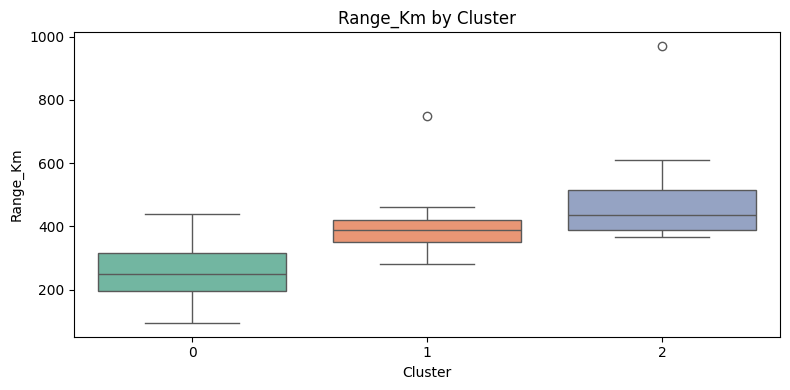

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


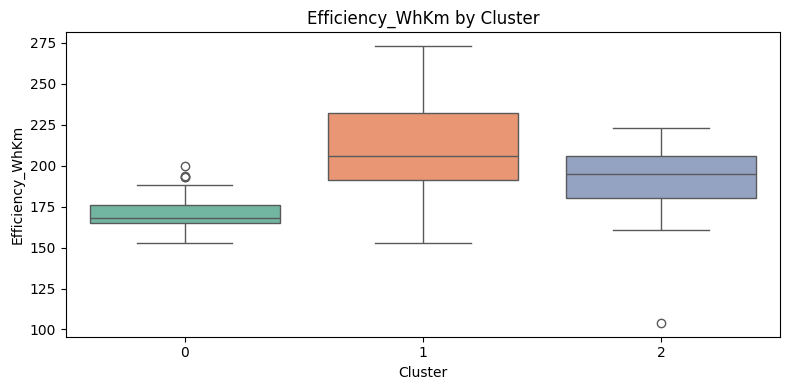

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


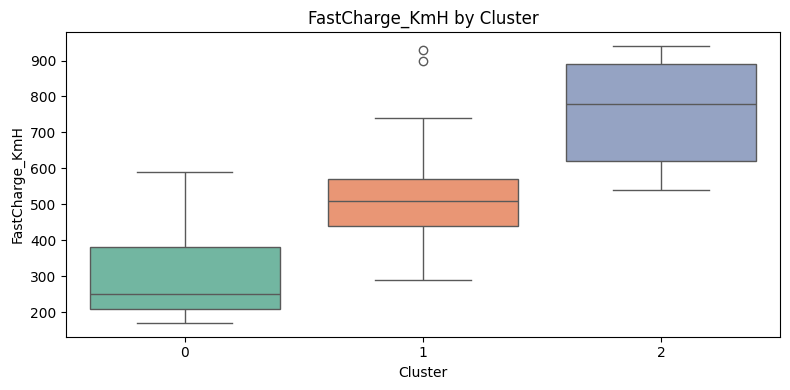

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


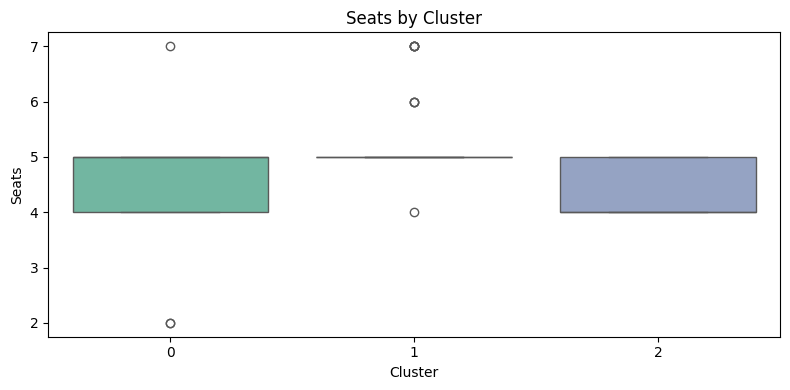

<ipython-input-25-19ea6282f970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')


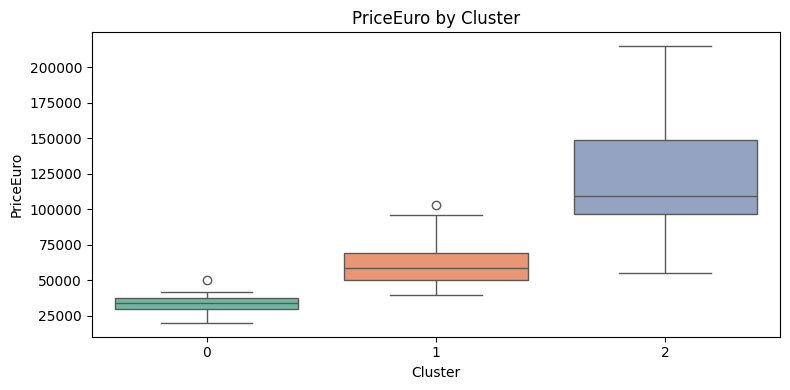

In [25]:
for column in ev_market_clean.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=column, data=df, palette='Set2')
    plt.title(f"{column} by Cluster")
    plt.tight_layout()
    plt.show()

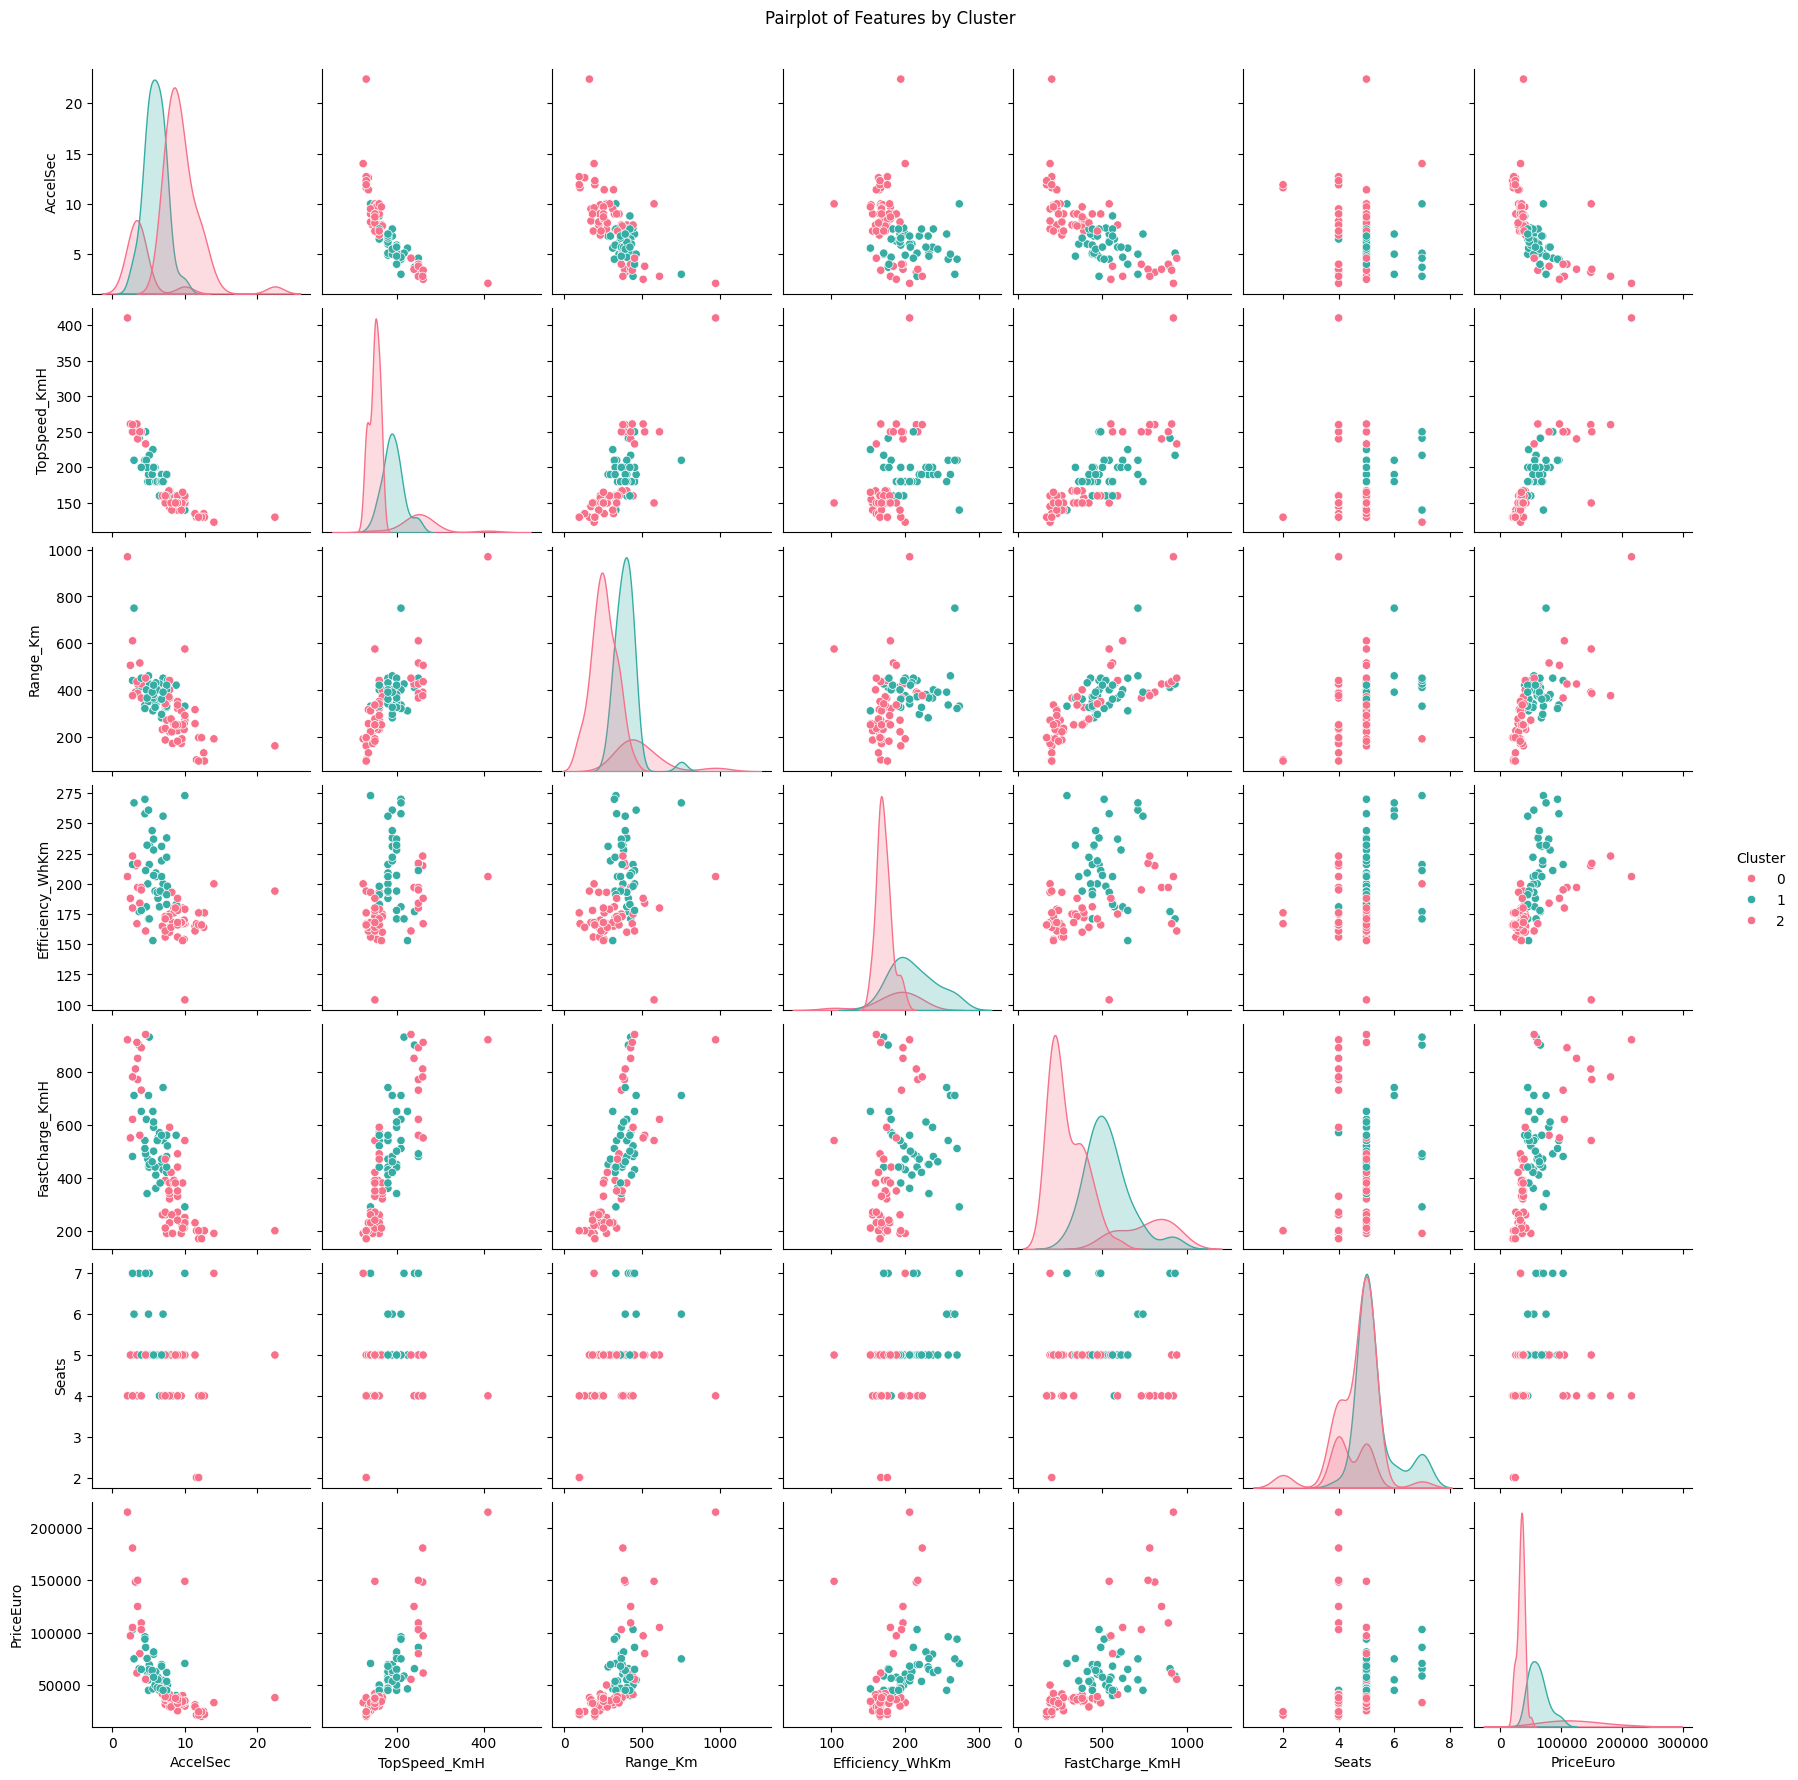

In [26]:
sampled_df = df.sample(n=min(200, len(df)))
sns.pairplot(sampled_df, hue='Cluster', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()

In [ ]:
print(df.head())

        Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  Cluster  
0  Type 2 CCS      Sedan       D      5      55480        2  
1  Type 2 CCS  H